In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(train_x, _), (test_x, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
# 데이터 정규화 및 Reshape
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.
def shrink(data, rows, cols):
    return data.reshape(data.shape[0], rows, int(data.shape[1]/rows), cols, int(data.shape[2]/cols)).sum(axis=2).sum(axis=3)

reduced_train_x = shrink(train_x, 14, 14)
reduced_test_x = shrink(test_x, 14, 14)
print(reduced_train_x.shape)
print(reduced_test_x.shape)

(60000, 14, 14)
(10000, 14, 14)


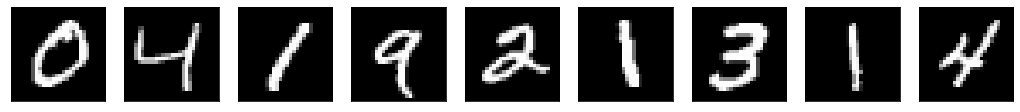

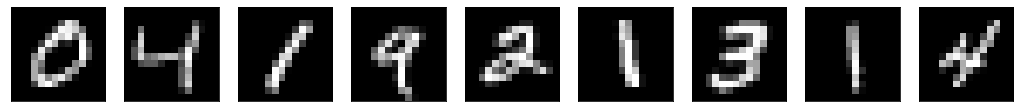

In [3]:
n = 10

plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(train_x[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 해상도 낮아진 이미지 확인
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(reduced_train_x[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
reduced_train_x = reduced_train_x.reshape(reduced_train_x.shape[0], 14*14)
reduced_test_x = reduced_test_x.reshape(reduced_test_x.shape[0], 14*14)
train_x = train_x.reshape(train_x.shape[0], 28*28)
test_x = test_x.reshape(test_x.shape[0], 28*28)
print(reduced_train_x.shape)
print(train_x.shape)
print(reduced_test_x.shape)
print(test_x.shape)

(60000, 196)
(60000, 784)
(10000, 196)
(10000, 784)


In [5]:
# 모델 정의
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=14*14))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(reduced_train_x, train_x, epochs=50, batch_size=256, validation_split=0.1)

Epoch 1/50
211/211 [==============================] - 3s 4ms/step - loss: 0.0619 - val_loss: 0.0349
Epoch 2/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0288 - val_loss: 0.0245
Epoch 3/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0230 - val_loss: 0.0215
Epoch 4/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0204 - val_loss: 0.0192
Epoch 5/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0184 - val_loss: 0.0179
Epoch 6/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0169 - val_loss: 0.0161
Epoch 7/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0157 - val_loss: 0.0152
Epoch 8/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0149 - val_loss: 0.0147
Epoch 9/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0143 - val_loss: 0.0140
Epoch 10/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0139 - val_loss: 0.0136

In [ ]:
# 결과 확인
super_resolutioned = model.predict(reduced_test_x)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(test_x[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reduced
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reduced_test_x[i].reshape(14,14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display super resolution
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(super_resolutioned[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()